In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

from scipy.io.wavfile import read
from scipy.signal import butter, lfilter, freqz

%matplotlib inline

In [2]:
ls 

3d FFT toy model.ipynb  FFT.ipynb               a0001.wav


The length of this is 7000 samples
This was sampled at 2000 samples/sec
So, the recording is 3.5 seconds long


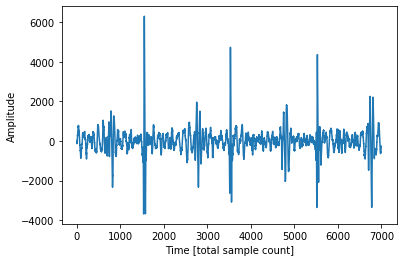

In [3]:
t = np.linspace(0, 0.5, 500)

rate, data = wav.read('a0001.wav')

data = data[0:7000]

print(f"The length of this is {len(data)} samples")
print(f"This was sampled at {rate} samples/sec")
print(f"So, the recording is {len(data)/rate} seconds long")

plt.ylabel("Amplitude")
plt.xlabel("Time [total sample count]")
plt.plot(data)
plt.show()

Let's stretch that out a bit.

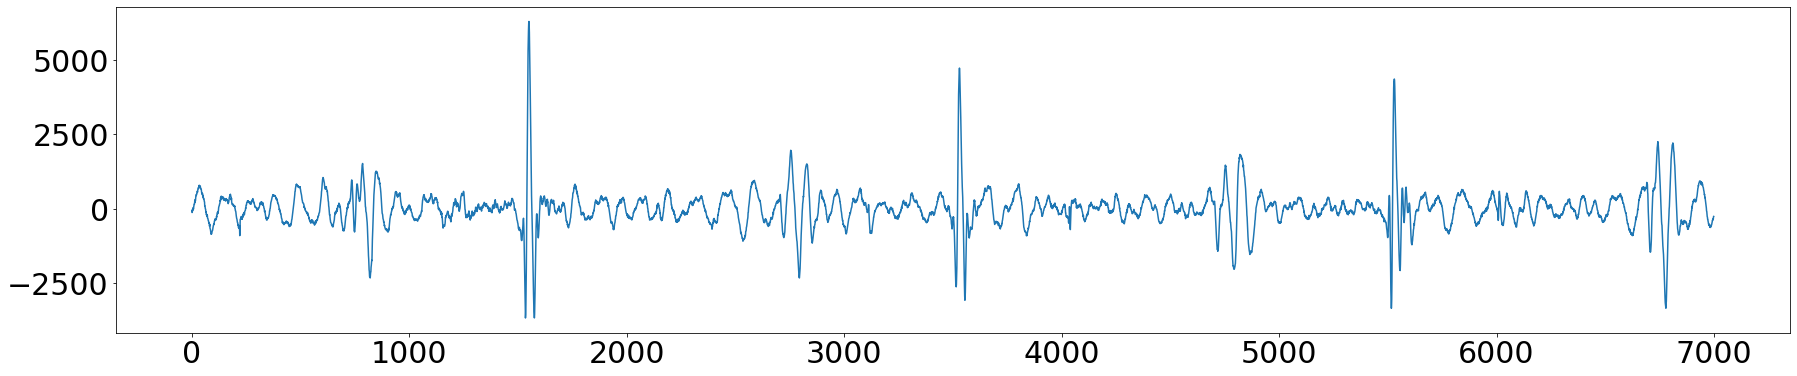

(7000,)

In [21]:
plt.figure(figsize=(30,6))
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.plot(data)
plt.show()
data.shape

In [5]:
fft = np.fft.fft(data)

for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(11134.42458183263+142.73001775226635j) 
Value at index 6999:	(11134.424581832653-142.73001775225055j)
Value at index 1:	(11159.62403907858+327.39227308950353j) 
Value at index 6998:	(11159.624039078592-327.3922730895025j)


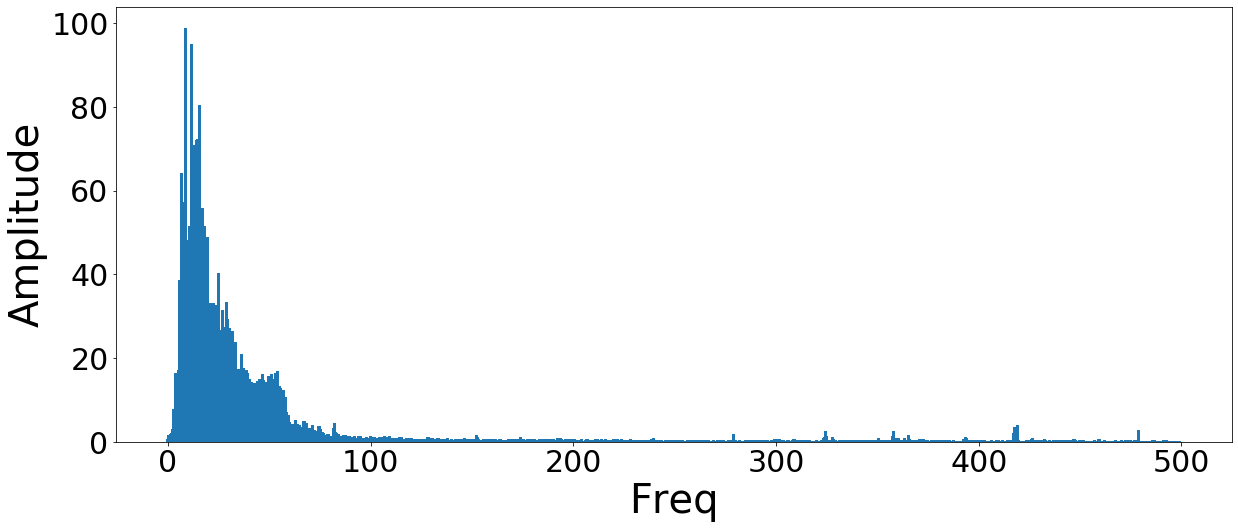

In [40]:
fft = np.fft.fft(data)
T = t[1] - t[0]  # sampling interval 
D = data.size
f = np.linspace(0, 1/T, D) #(start, stop, # of bins); 1/T = frequency
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.figure(figsize=(20,8))
plt.ylabel("Amplitude", fontsize = 40)
plt.xlabel("Freq", fontsize = 40)
plt.bar(f[:D // 2], np.abs(fft)[: D// 2] * 1 / D, width=1.5)  # 1 / N is a normalization factor
plt.show()

That intially took a really long time (about 15 min), which seems to mean that I'll need to cut these into shorter lengths. 3.5 seconds is pretty manageable

In [7]:
D


7000

This section is as above but for twiddeling with the numbers, if desired.

In [41]:
# fft = np.fft.fft(data)
# T = t[1] - t[0]  # sampling interval 
# D = data.size
# f = np.linspace(0, 1/T, D) #(start, stop, # of bins); 1/T = frequency

# plt.figure(figsize=(20,8))
# plt.ylabel("Amplitude")
# plt.xlabel("Freq")
# plt.bar(f[:D // 2], np.abs(fft)[: D// 2] * 1 / D, width=1.5)  # 1 / N is a normalization factor
# # plt.show()

In [42]:
# fft = np.fft.fft(data)

# for i in range(80,100):
#     print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))


### Now to run the freqs against scipy welch to get the power spectral density

In [10]:
from scipy import signal


In [11]:
fs = 2000 # sample rate in Hz. This has to be at least 2x the freq
N = D//2 # number of samples
amp = 2*np.sqrt(2)
freq = np.abs(fft)[: D// 2] * 1 / D
time = np.arange(N) / fs
#x = amp*np.sin(2*np.pi*freq*time)

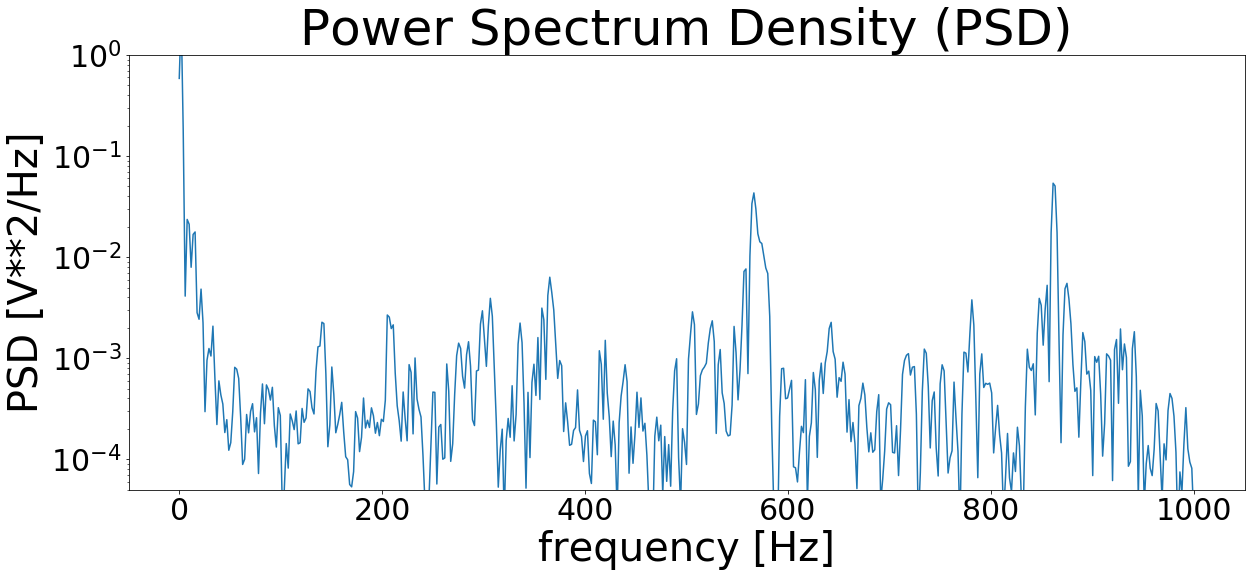

In [44]:
f, Pxx_den = signal.welch(freq, fs, nperseg=1024)

plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.semilogy(f, Pxx_den)
plt.ylim([.05e-3, 1])
plt.title('Power Spectrum Density (PSD)', fontsize = 50)
plt.xlabel('frequency [Hz]', fontsize = 40)
plt.ylabel('PSD [V**2/Hz]', fontsize = 40)
plt.show()

# Now let's find the freqs at the peaks

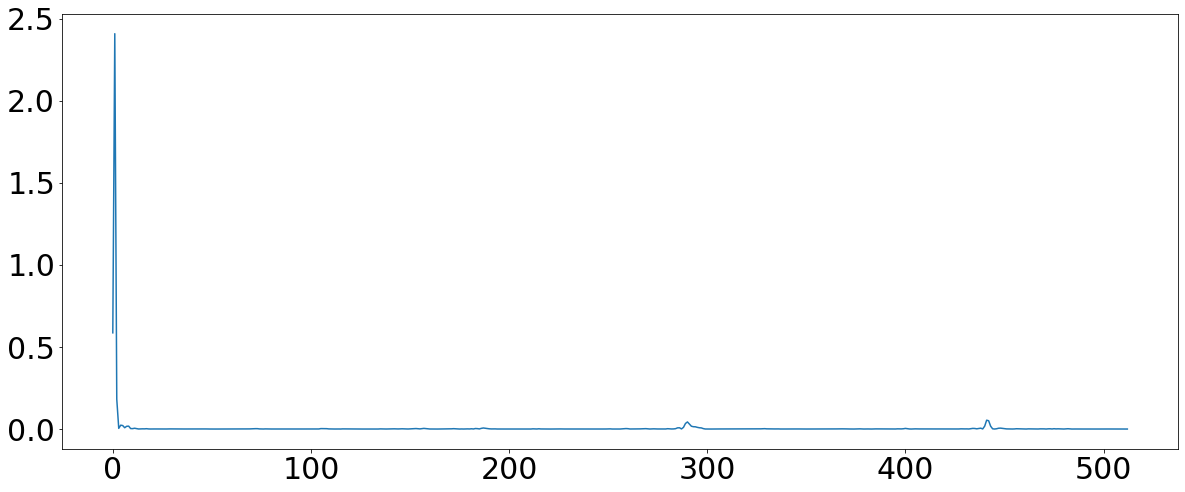

In [51]:
from scipy.signal import convolve


#Obtaining derivative
kernel = [1, 0, -1]
dY = convolve(Pxx_den, kernel, 'valid') 

#Checking for sign-flipping
S = np.sign(dY)
ddS = convolve(S, kernel, 'valid')

#These candidates are basically all negative slope positions
#Add one since using 'valid' shrinks the arrays
candidates = np.where(dY < 0)[0] + (len(kernel) - 1)

#Here they are filtered on actually being the final such position in a run of
#negative slopes
peaks = sorted(set(candidates).intersection(np.where(ddS == 2)[0] + 1))

plt.figure(figsize=(20,8))
plt.plot(Pxx_den)

#If you need a simple filter on peak size you could use:
alpha = -0.0025
peaks = np.array(peaks)[Pxx_den[peaks] < alpha]


plt.scatter(peaks, Pxx_den[peaks], marker='x', color='g', s=40)


In [46]:
sortedPxx=sorted(Pxx_den)[::-1]
sortedPxx

[2.407762650764956,
 0.5859278605751801,
 0.18177618959415515,
 0.0538774552331963,
 0.050529905657755045,
 0.04318092170246722,
 0.033816801624068034,
 0.029991434425896114,
 0.02360661980344631,
 0.021162487109752628,
 0.017742161545667177,
 0.017468096211439924,
 0.01744175423730438,
 0.01701437858711733,
 0.01676625718093118,
 0.014186501490579975,
 0.013636349062183481,
 0.010296696237619942,
 0.010247248480035862,
 0.00793996461449557,
 0.00781923969886068,
 0.007644819643683294,
 0.0072203754767154685,
 0.006897285504703529,
 0.006334607737679321,
 0.0055065196509278295,
 0.005266644487737285,
 0.004866163640005264,
 0.004828304053467449,
 0.004478008369116132,
 0.004166396838558216,
 0.0041152619268467975,
 0.0039162112713922986,
 0.003912282704762642,
 0.0038409458764389454,
 0.003781629539561122,
 0.0033438658151189633,
 0.00313456111731122,
 0.0030607187847729914,
 0.0030086402751961076,
 0.0029472207021972404,
 0.0028777872795104084,
 0.002823776806156258,
 0.00267707096210

In [47]:
indices_Pxx_high_low = np.argsort(Pxx_den)[::-1]
top_n = 10
top_freq = f[indices_Pxx_high_low][:top_n]
top_amp = Pxx_den[indices_Pxx_high_low][:top_n]
print(top_freq)
print(top_amp)

[  1.953125   0.         3.90625  861.328125 863.28125  566.40625
 564.453125 568.359375   7.8125     9.765625]
[2.40776265 0.58592786 0.18177619 0.05387746 0.05052991 0.04318092
 0.0338168  0.02999143 0.02360662 0.02116249]


In [48]:
out= np.argsort(dY)[0:22]
out

array([  1,   0,   2, 442, 441, 290, 443, 291,   4,   8,   7, 297, 285,
       294, 296,  11,   5, 293, 289, 292, 400, 295])

In [49]:
top_n = f[out]
top_n

array([  1.953125,   0.      ,   3.90625 , 863.28125 , 861.328125,
       566.40625 , 865.234375, 568.359375,   7.8125  ,  15.625   ,
        13.671875, 580.078125, 556.640625, 574.21875 , 578.125   ,
        21.484375,   9.765625, 572.265625, 564.453125, 570.3125  ,
       781.25    , 576.171875])

# I think at this point we can apply filters. Or, maybe say F* it and try a different route for now.

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz (orig 30.0)
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


Demonstrate the use of the filter.
First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
"Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)

plt.show()

In [50]:
def slice_rename(start_dir):
    for dirName, subdirList, fileList in os.walk(rootDir):
        print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)


import os
import numpy as np
from scipy.io import wavfile as wav
from scipy.io.wavfile import read, write
import pdb

start_dir = '/Users/alex/Galvanize/Work_Done/projects/Capstone Projects/Heartbeat/reserve data/test run'

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if file.endswith(".wav"):
            print(f"found file {file}")
            if file == 'a0008.wav':
                #pdb.set_trace()
                rate, data = wav.read(file)
            print(f"read file {file}")

            len_data=len(data)//10000
            print(f"length of the file is {len_data}")

            n_slices = min(len_data, 4)

            for i in range(n_slices):        
                slice_start = 10000 * i        
                slice_end = 10000 * (i+1)        
                sliced = data[slice_start:slice_end] # good to here

                # save files with similar name (_1, _2, etc)
                saveas = os.path.join(root, file, '_', i)
                scipy.io.wavfile.write(saveas, 2000, sliced)

                    